# IMOS National Reference Station
Experimental Notebook 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import geopandas as gp
import shapely
import fiona

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
saved_style_state = matplotlib.rcParams.copy()

In [4]:
os.path.isfile('Dataset - Water Quality/IMOS National Reference Station(NRS).csv')
Dataset = 'Dataset - Water Quality/IMOS National Reference Station(NRS).csv'
water_data = pd.read_csv(Dataset)

In [10]:
water_data

#Raw Dataframe

,STATION_NAME,NRS_SAMPLE_CODE,UTC_TRIP_START_TIME,LATITUDE,LONGITUDE,SAMPLE_DEPTH_M,SALINITY,SILICATE_UMOL_PER_L,NITRATE_UMOL_PER_L,PHOSPHATE_UMOL_PER_L,AMMONIUM_UMOL_PER_L,TCO2_UMOL_PER_KG,ALKALINITY_UMOL_PER_KG,geom
0,Darwin,NRSDAR20110627_000,2011-06-27T04:18:00Z,-12.4000,130.7680,0.0,32.933,5.8,0.2,0.39,0.32,1922.49,2198.30,POINT (130.76805 -12.4)
1,Darwin,NRSDAR20110627_010,2011-06-27T04:18:00Z,-12.4000,130.7680,10.0,32.905,6.0,0.1,0.32,0.02,1931.90,2201.75,POINT (130.76805 -12.4)
2,Darwin,NRSDAR20110627_014,2011-06-27T04:18:00Z,-12.4000,130.7680,14.0,32.888,6.3,0.2,0.32,0.11,1931.42,2203.74,POINT (130.76805 -12.4)
3,Darwin,NRSDAR20111005_000,2011-10-05T00:01:00Z,-12.4000,130.7680,0.0,33.722,6.5,0.2,0.29,0.08,1993.13,2267.87,POINT (130.76805 -12.4)
4,Darwin,NRSDAR20111005_010,2011-10-05T00:01:00Z,-12.4000,130.7680,10.0,33.742,6.3,0.1,0.26,0.04,1988.61,2266.31,POINT (130.76805 -12.4)
5,Darwin,NRSDAR20111005_020,2011-10-05T00:01:00Z,-12.4000,130.7680,20.0,33.720,6.4,0.1,0.25,0.10,1983.96,2260.35,POINT (130.76805 -12.4)
6,Darwin,NRSDAR20120114_21:30_000,2012-01-14T21:30:00Z,-12.4000,130.7680,0.0,33.661,4.6,1.9,0.65,3.32,1962.64,2243.91,POINT (130.76805 -12.4)
7,Darwin,NRSDAR20120114_21:30_010,2012-01-14T21:30:00Z,-12.4000,130.7680,10.0,33.662,5.2,0.5,0.38,0.27,1962.82,2243.85,POINT (130.76805 -12.4)
8,Darwin,NRSDAR20120114_21:30_020,2012-01-14T21:30:00Z,-12.4000,130.7680,20.0,33.670,5.5,0.4,0.31,2.78,1961.57,2240.87,POINT (130.76805 -12.4)
9,Darwin,NRSDAR20120114_23:35_000,2012-01-14T23:35:00Z,-12.4000,130.7680,0.0,33.518,5.3,0.2,0.27,0.35,1948.68,2229.31,POINT (130.76805 -12.4)


In [49]:
water_data.columns

Index(['STATION_NAME', 'NRS_SAMPLE_CODE', 'UTC_TRIP_START_TIME', 'LATITUDE',
       'LONGITUDE', 'SAMPLE_DEPTH_M', 'SALINITY', 'SILICATE_UMOL_PER_L',
       'NITRATE_UMOL_PER_L', 'PHOSPHATE_UMOL_PER_L', 'AMMONIUM_UMOL_PER_L',
       'TCO2_UMOL_PER_KG', 'ALKALINITY_UMOL_PER_KG', 'geom'],
      dtype='object')

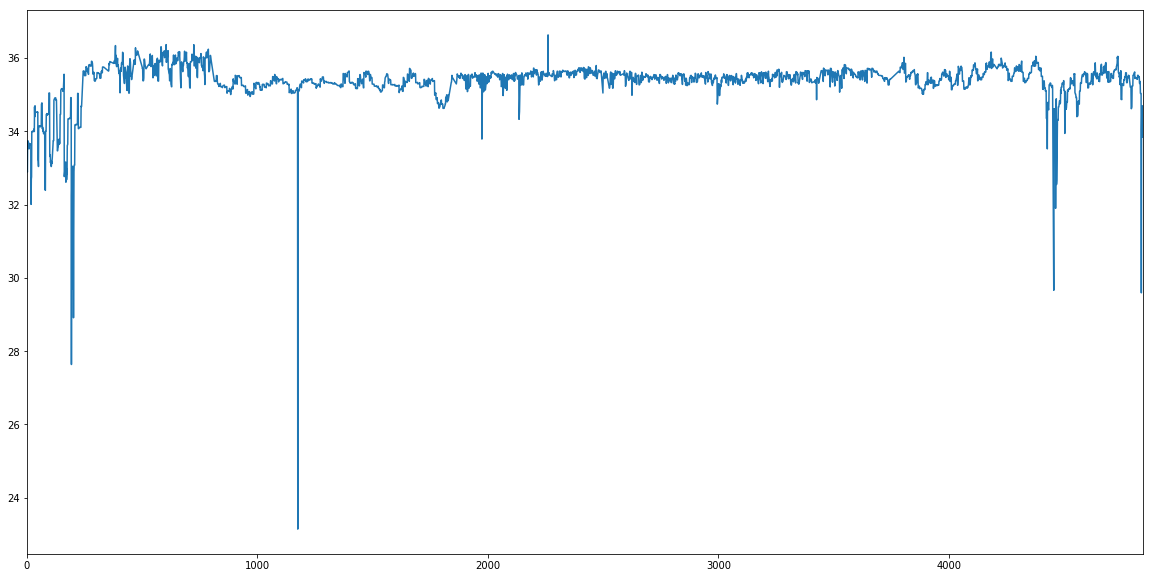

In [50]:
#SALINITY

water_data["SALINITY"][water_data["SALINITY"] > 1].plot()

Text(0, 0.5, 'Spread')

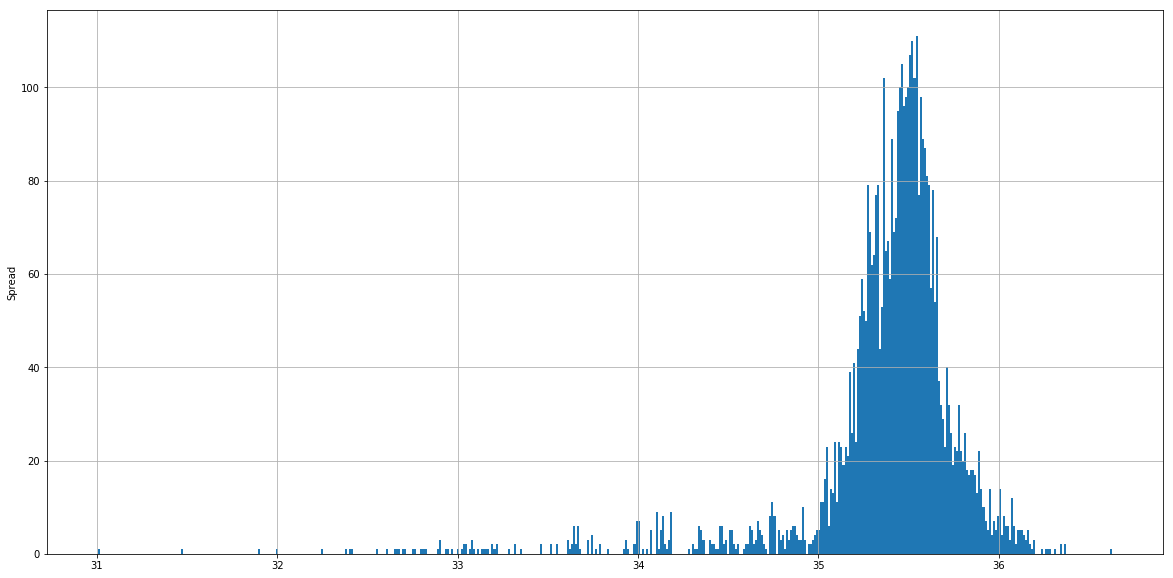

In [51]:
water_data["SALINITY"][water_data["SALINITY"] > 30].hist(bins = 500)
plt.ylabel("Salinity in ppt (parts per thousands)")
plt.ylabel("Spread")

#Salinity does not fluctuate dramaticly 

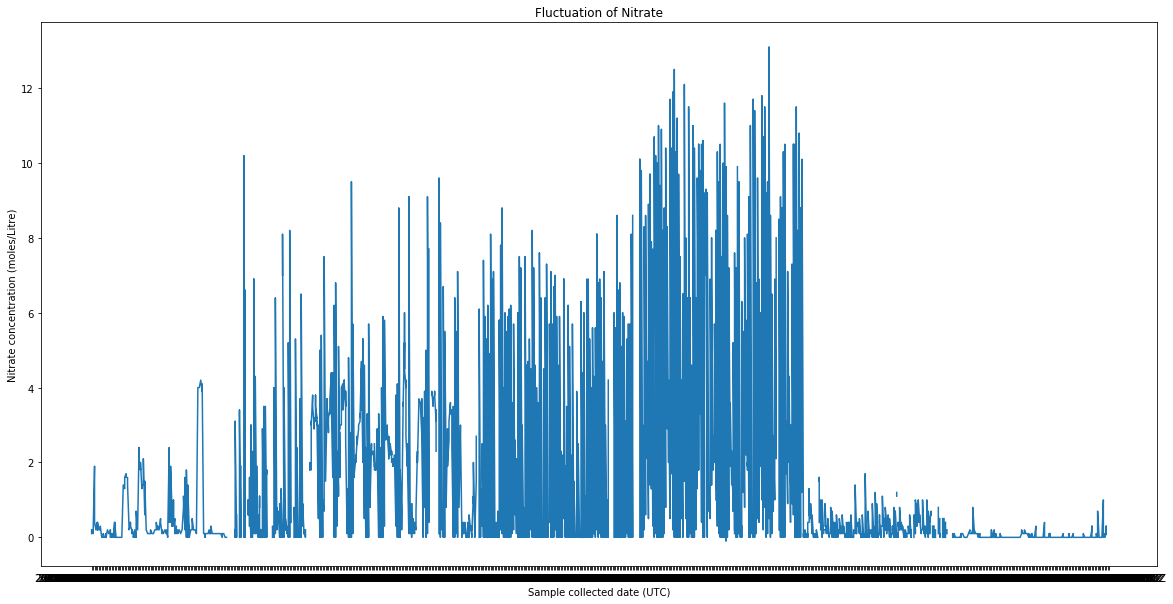

In [57]:
#Nitrate content 

x = water_data['UTC_TRIP_START_TIME']
y = water_data['NITRATE_UMOL_PER_L']
plt.title("Fluctuation of Nitrate")
plt.xlabel("Sample collected date (UTC)")
plt.ylabel("Nitrate concentration (moles/Litre)")
plt.plot(x, y)
plt.show()

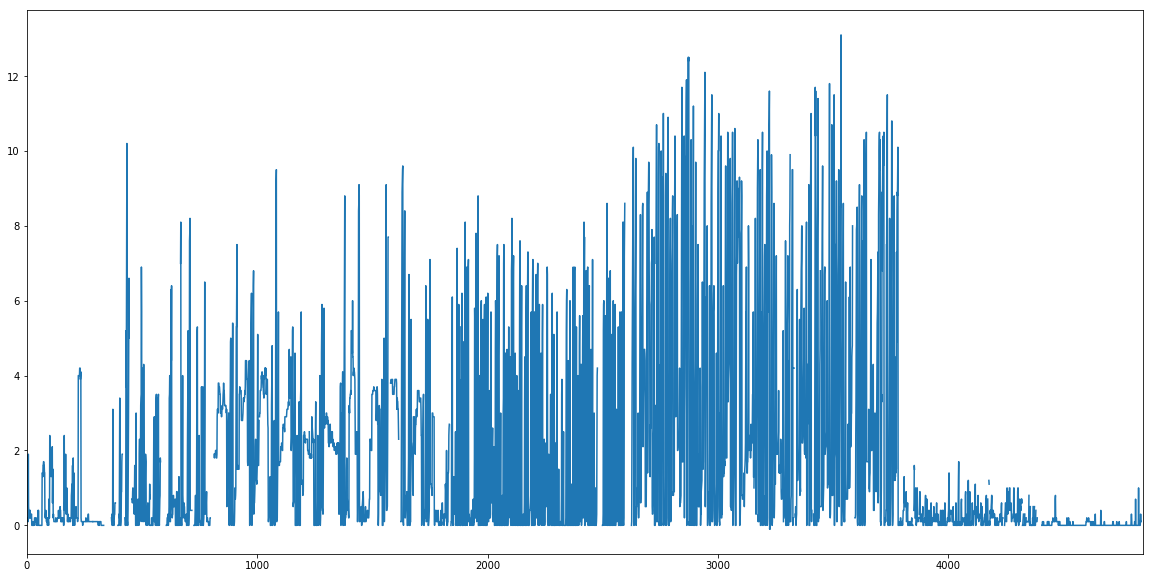

In [11]:
water_data['NITRATE_UMOL_PER_L'].plot()

In [ ]:
water_data["STATION_NAME"]


In [ ]:
#Salinity across 9 locations

station_name = water_data["STATION_NAME"].hist()
station_name

In [ ]:
type(station_name)

In [16]:
water_data

,STATION_NAME,NRS_SAMPLE_CODE,UTC_TRIP_START_TIME,LATITUDE,LONGITUDE,SAMPLE_DEPTH_M,SALINITY,SILICATE_UMOL_PER_L,NITRATE_UMOL_PER_L,PHOSPHATE_UMOL_PER_L,AMMONIUM_UMOL_PER_L,TCO2_UMOL_PER_KG,ALKALINITY_UMOL_PER_KG,geom
0,Darwin,NRSDAR20110627_000,2011-06-27T04:18:00Z,-12.4000,130.7680,0.0,32.933,5.8,0.2,0.39,0.32,1922.49,2198.30,POINT (130.76805 -12.4)
1,Darwin,NRSDAR20110627_010,2011-06-27T04:18:00Z,-12.4000,130.7680,10.0,32.905,6.0,0.1,0.32,0.02,1931.90,2201.75,POINT (130.76805 -12.4)
2,Darwin,NRSDAR20110627_014,2011-06-27T04:18:00Z,-12.4000,130.7680,14.0,32.888,6.3,0.2,0.32,0.11,1931.42,2203.74,POINT (130.76805 -12.4)
3,Darwin,NRSDAR20111005_000,2011-10-05T00:01:00Z,-12.4000,130.7680,0.0,33.722,6.5,0.2,0.29,0.08,1993.13,2267.87,POINT (130.76805 -12.4)
4,Darwin,NRSDAR20111005_010,2011-10-05T00:01:00Z,-12.4000,130.7680,10.0,33.742,6.3,0.1,0.26,0.04,1988.61,2266.31,POINT (130.76805 -12.4)
5,Darwin,NRSDAR20111005_020,2011-10-05T00:01:00Z,-12.4000,130.7680,20.0,33.720,6.4,0.1,0.25,0.10,1983.96,2260.35,POINT (130.76805 -12.4)
6,Darwin,NRSDAR20120114_21:30_000,2012-01-14T21:30:00Z,-12.4000,130.7680,0.0,33.661,4.6,1.9,0.65,3.32,1962.64,2243.91,POINT (130.76805 -12.4)
7,Darwin,NRSDAR20120114_21:30_010,2012-01-14T21:30:00Z,-12.4000,130.7680,10.0,33.662,5.2,0.5,0.38,0.27,1962.82,2243.85,POINT (130.76805 -12.4)
8,Darwin,NRSDAR20120114_21:30_020,2012-01-14T21:30:00Z,-12.4000,130.7680,20.0,33.670,5.5,0.4,0.31,2.78,1961.57,2240.87,POINT (130.76805 -12.4)
9,Darwin,NRSDAR20120114_23:35_000,2012-01-14T23:35:00Z,-12.4000,130.7680,0.0,33.518,5.3,0.2,0.27,0.35,1948.68,2229.31,POINT (130.76805 -12.4)


In [17]:
burbs = gp.GeoDataFrame.(water_data)
# burbs.drop("geom", axis=1, inplace=True)


SyntaxError: invalid syntax (<ipython-input-17-729a3596303e>, line 1)